In [3]:
# Importing necessary libraries for analysing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Importing dataset
airbnb_data = pd.read_csv("AB_NYC_2019.csv")


In [8]:
#Now let's look at the data
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [11]:
# Checking the shape of datset
print(f'The shape of Airbnb Dataset is {airbnb_data.shape}')

The shape of Airbnb Dataset is (48895, 16)


In [13]:
# Checking the feature names
print(f' The names of the features present in the dataset are: ')
list(airbnb_data.columns)

 The names of the features present in the dataset are: 


['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [15]:
#Checking for categorical columns
cat_cols = airbnb_data.select_dtypes(include = 'object').columns
print(f' The following are the categorical features in the dataset: {list(cat_cols)}')

 The following are the categorical features in the dataset: ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


In [17]:
# Checking for numeric/ non categorical columns
num_cols = airbnb_data.select_dtypes(exclude = 'object').columns
print(' The following are the non categorical features in the dataset:') 
list(num_cols)

 The following are the non categorical features in the dataset:


['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [20]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [23]:
airbnb_data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [25]:
# Checking the information of the dataset
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [27]:
# Checking for the null values
print(f'The missing values before cleaning the data are:')
airbnb_data.isnull().sum()

The missing values before cleaning the data are:


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The features like last_reviews and reviews_per_month have most null values in the dataset.

In [31]:
# Filling missing values
airbnb_data['name'].fillna('Absent', inplace = True)
airbnb_data['host_name'].fillna('Absent', inplace =  True)

In [33]:
# Dropping the unncessary columns.
airbnb_data_new = airbnb_data.drop(['last_review','reviews_per_month'], axis =1)
airbnb_data_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [35]:
# Checking for null values in the new dataset
print(f'The number of missing values after cleaning the data are:')
airbnb_data_new.isnull().sum()

The number of missing values after cleaning the data are:


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [38]:
# Let's see who has the most listings and in which neighbourhood.
host_areas = airbnb_data_new.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
top_hosts = host_areas.sort_values(by = ['calculated_host_listings_count'], ascending = False).head(9)
top_hosts

,host_name,neighbourhood_group,calculated_host_listings_count
13221,Sonder (NYC),Manhattan,327
1838,Blueground,Manhattan,232
1837,Blueground,Brooklyn,232
7279,Kara,Manhattan,121
7482,Kazuya,Brooklyn,103
7484,Kazuya,Queens,103
7483,Kazuya,Manhattan,103
13220,Sonder,Manhattan,96
6544,Jeremy & Laura,Manhattan,96


From the above result, we can conclude that the name of the host with the most listings is Sonder(NYC) who has 327 listings in Manhattan

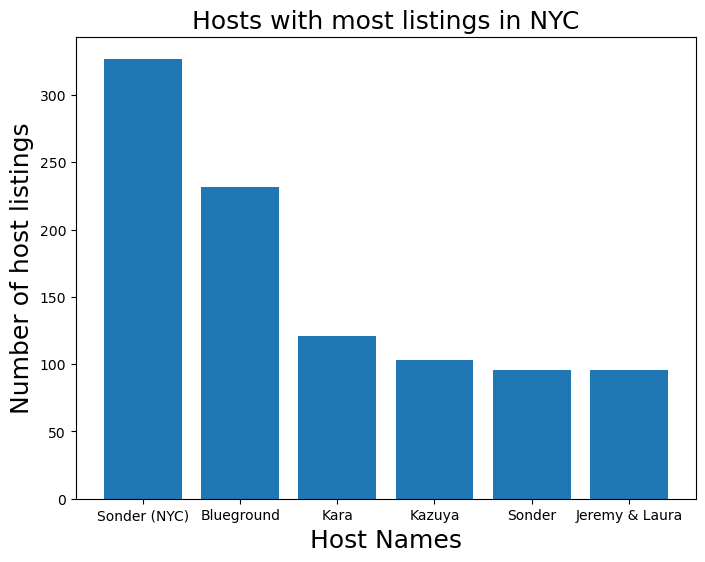

In [41]:
# Visualizing the hosts with most listings.
plt.rcParams['figure.figsize'] = (8,6)
host_name = top_hosts['host_name']
host_lisitng = top_hosts['calculated_host_listings_count']
plt.bar(host_name,host_lisitng)
plt.title('Hosts with most listings in NYC',{'fontsize':18})
plt.xlabel('Host Names',{'fontsize':18})
plt.ylabel('Number of host listings',{'fontsize':18})
plt.show()

In [43]:
# Number of Airbnb listed in each neighbourhood
data =airbnb_data_new.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id':'count'}).sort_values(by='count', ascending = False)
data.head()

,neighbourhood_group,count
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


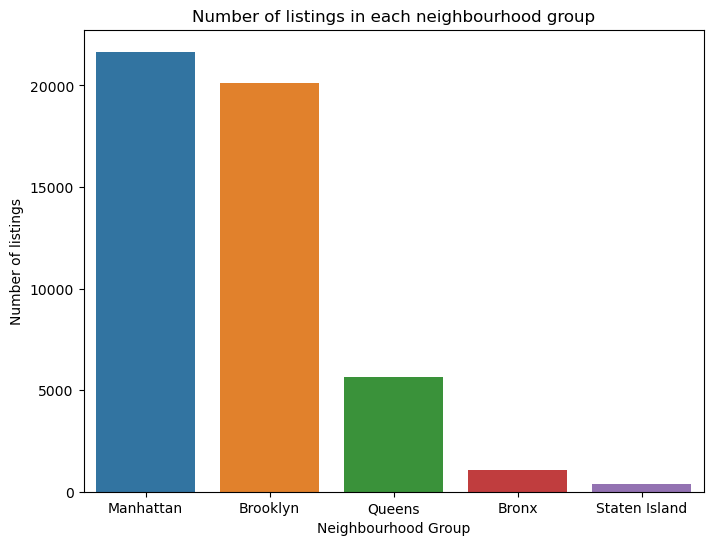

In [45]:
# Visualizing the number of listings in each neighbourhood through bar plot
plt.rcParams['figure.figsize'] = (8,6)
ax = sns.barplot(x = data['neighbourhood_group'], y = data['count'], data = data)
ax.set_xlabel('Neighbourhood Group')
ax.set_ylabel('Number of listings')
ax.set_title('Number of listings in each neighbourhood group')
plt.show()

In [47]:
# Finding which neighbourhood has got maximum number of reviews. 
areas_reviews = airbnb_data_new.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False)
areas_reviews

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


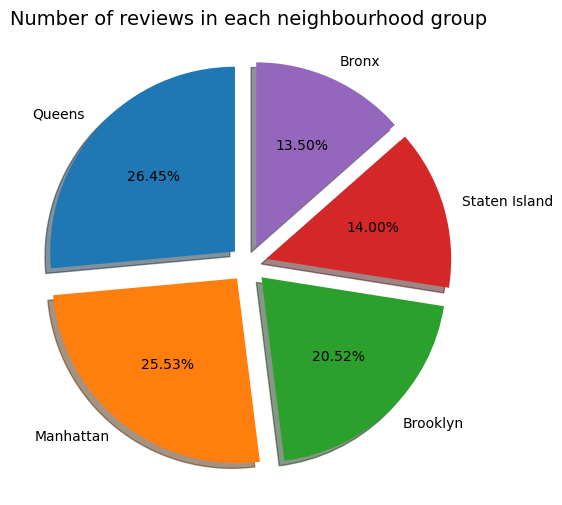

In [49]:
# Visualising the number of reviews in each neighbourhood group through pie chart
plt.rcParams['figure.figsize'] = (8,6)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews, labels = areas_reviews['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )
plt.title('Number of reviews in each neighbourhood group', {'fontsize': 14})
plt.show()

In [52]:
# Checking the descriptive statistics
airbnb_data_new.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [55]:
# Checking for outliers
airbnb_data_new.agg({'price':['mean','median','max','count']})

,price
mean,152.720687
median,106.000000
max,10000.000000
count,48895.000000


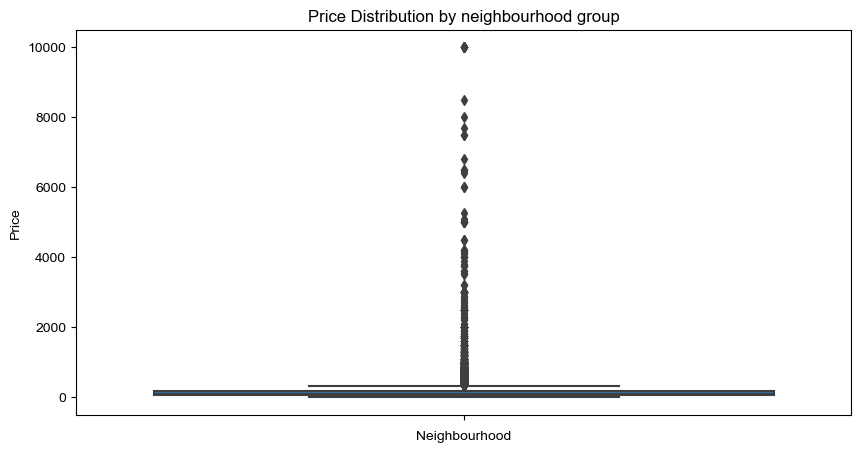

In [58]:
#Plotting the boxplot of the price data.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_data_new).set_title('Price Distribution by neighbourhood group')
sns.set_theme(style='white')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.show()

As expected there are outliers present in the data. In order to fix this, we will be using the quantile based flooring and capping.
First, let's print the 10th and 90th percentile of the price column.

In [61]:
#finding the low quantile
q_low = airbnb_data_new['price'].quantile(0.10)
q_low

49.0

In [63]:
# finding the high quantile
q_high = airbnb_data_new['price'].quantile(0.9)
q_high

269.0

In [66]:
#removing the values below 10th percentile and above 90th percentile
airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']<q_low].index)
airbnb_data_new = airbnb_data_new.drop(airbnb_data_new[airbnb_data_new['price']>q_high].index)

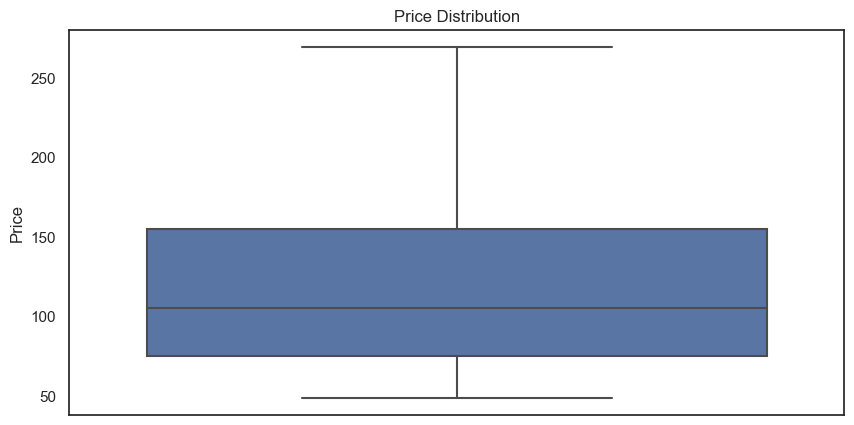

In [68]:
#Lets create a new boxplot and check the result.
plt.figure(figsize=(10,5))
ax = sns.boxplot(y='price', data=airbnb_data_new).set_title('Price Distribution')
sns.set_theme(style='white')
plt.ylabel('Price')
plt.show()

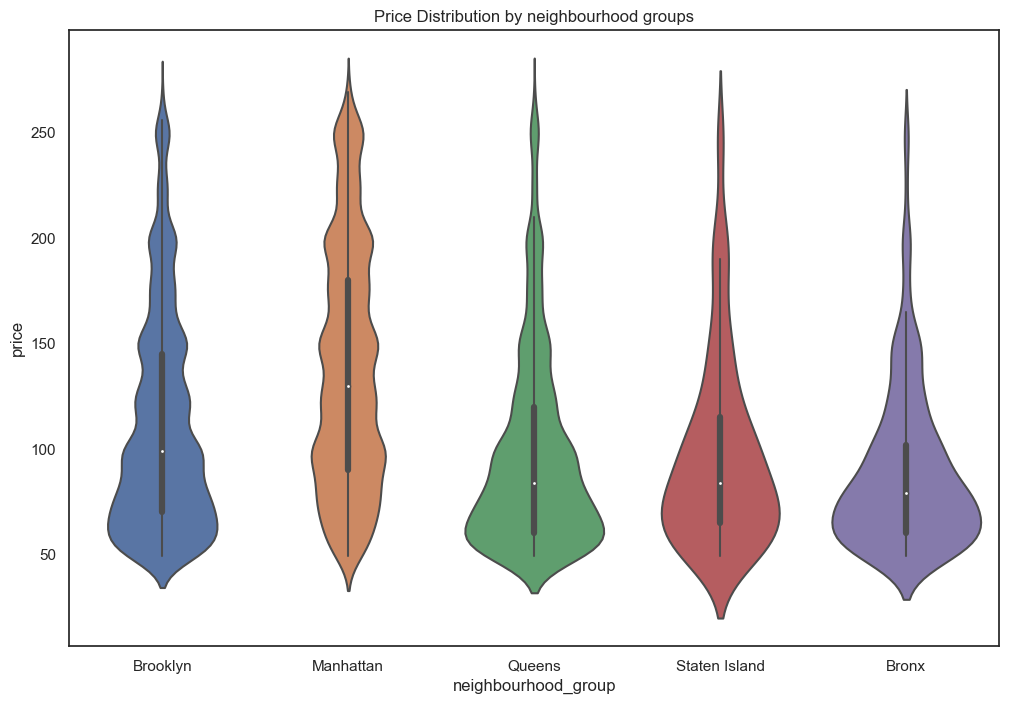

In [70]:
# Now lets see the price distribution by neighbourhood gropus
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb_data_new).set_title('Price Distribution by neighbourhood groups')
plt.show()

In [74]:
#Busiest hosts would be those who have maximum number of reviews as people are booking frequently at those hosts.

busiest_hosts = airbnb_data_new.groupby(['host_name','host_id','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,neighbourhood_group,number_of_reviews
14729,Jj,4734398,Private room,Manhattan,607
5194,Carol,2369681,Private room,Manhattan,540
3280,Asa,12949460,Entire home/apt,Brooklyn,488
31453,Wanda,792159,Private room,Brooklyn,480
18686,Linda,2680820,Private room,Queens,474
7176,Dani,42273,Entire home/apt,Brooklyn,467
2434,Angela,23591164,Private room,Queens,466
465,Agnes,277379,Private room,Manhattan,458
14973,John,2267153,Private room,Manhattan,451
8210,Dennis & Naoko,307962,Entire home/apt,Queens,441


<BarContainer object of 10 artists>

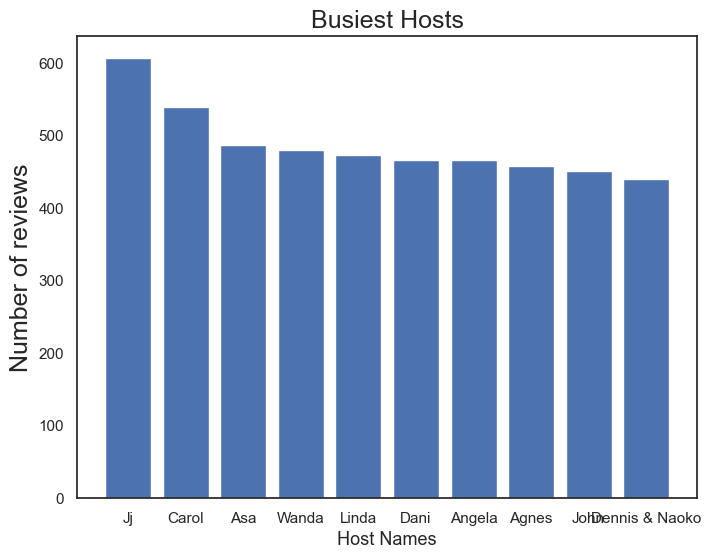

In [76]:
# Visualising the busiest hosts data through bar plot.
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']
plt.title('Busiest Hosts', {'fontsize':18})
plt.xlabel('Host Names',{'fontsize':13})
plt.ylabel('Number of reviews',{'fontsize':18})
plt.bar(host_name, reviews)

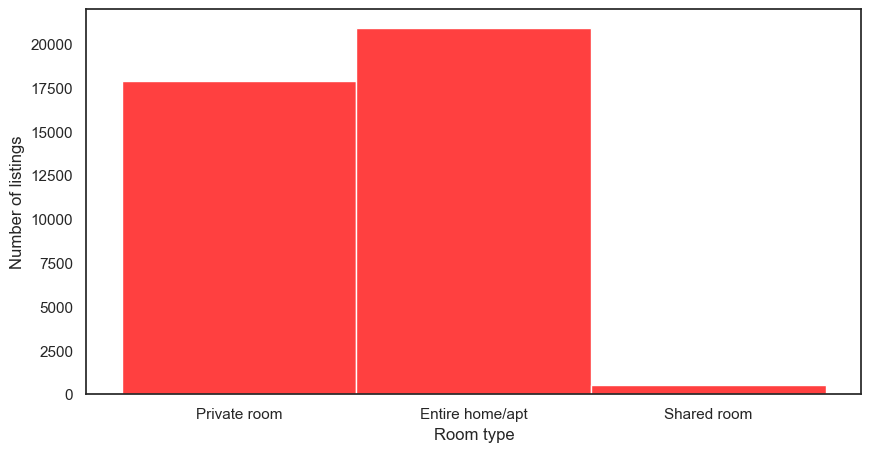

In [78]:
# Plotting histogram for room types to look for which are most preferred room types.
plt.rcParams['figure.figsize'] = (10,5)
hp = sns.histplot(airbnb_data_new['room_type'], color= 'red')
hp.set_xlabel('Room type') 
hp.set_ylabel('Number of listings')
plt.show()

In [83]:
# Lets find the top 10 neighbourhoods with most listings
df1 = airbnb_data_new.groupby(['neighbourhood'])['id'].count().nlargest(10)
df1

neighbourhood
Williamsburg          3415
Bedford-Stuyvesant    2963
Harlem                2311
Bushwick              1846
Upper West Side       1619
East Village          1590
Hell's Kitchen        1576
Upper East Side       1561
Crown Heights         1257
Midtown               1002
Name: id, dtype: int64

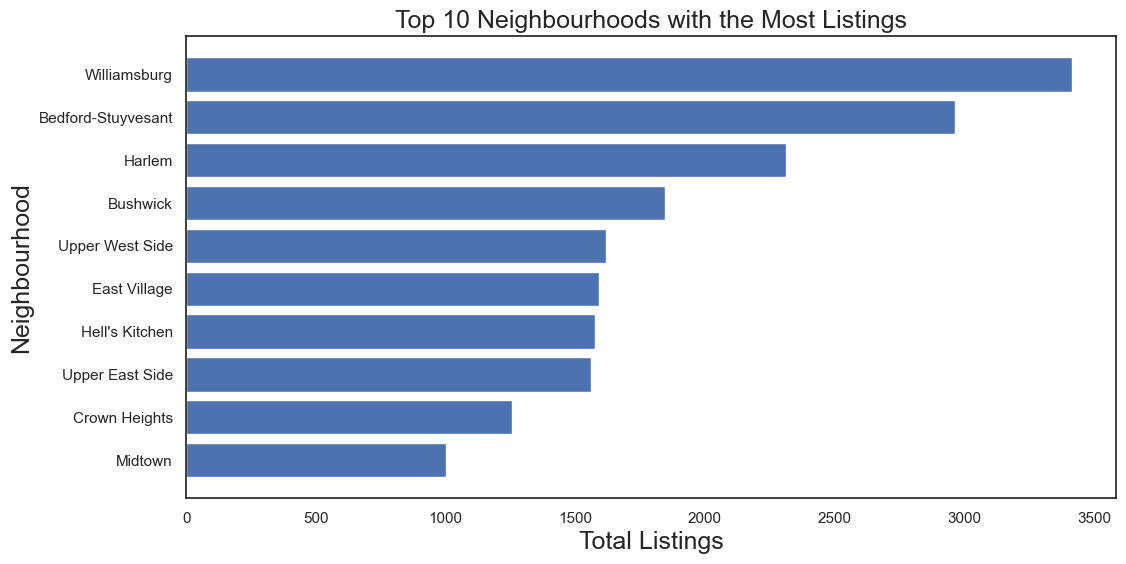

In [85]:
# Visualizing the top 10 neighbourhood listings through bar plot
plt.figure(figsize=(12,6))
x = list(df1.index)
y = list(df1.values)
x.reverse()
y.reverse()

plt.title("Top 10 Neighbourhoods with the Most Listings", {'fontsize':18})
plt.ylabel("Neighbourhood", {'fontsize':18})
plt.xlabel("Total Listings", {'fontsize':18})

plt.barh(x, y)
plt.show()

In [88]:
airbnb_data_new.groupby(['neighbourhood_group','neighbourhood','room_type'])['number_of_reviews'].max().reset_index().sort_values(by = 'number_of_reviews', ascending = False).head(10)

,neighbourhood_group,neighbourhood,room_type,number_of_reviews
255,Manhattan,Harlem,Private room,607
270,Manhattan,Lower East Side,Private room,540
196,Brooklyn,Park Slope,Entire home/apt,488
132,Brooklyn,Bushwick,Private room,480
358,Queens,Flushing,Private room,474
212,Brooklyn,South Slope,Entire home/apt,467
348,Queens,East Elmhurst,Private room,466
241,Manhattan,East Village,Private room,451
318,Queens,Astoria,Entire home/apt,441
419,Queens,Springfield Gardens,Entire home/apt,434
